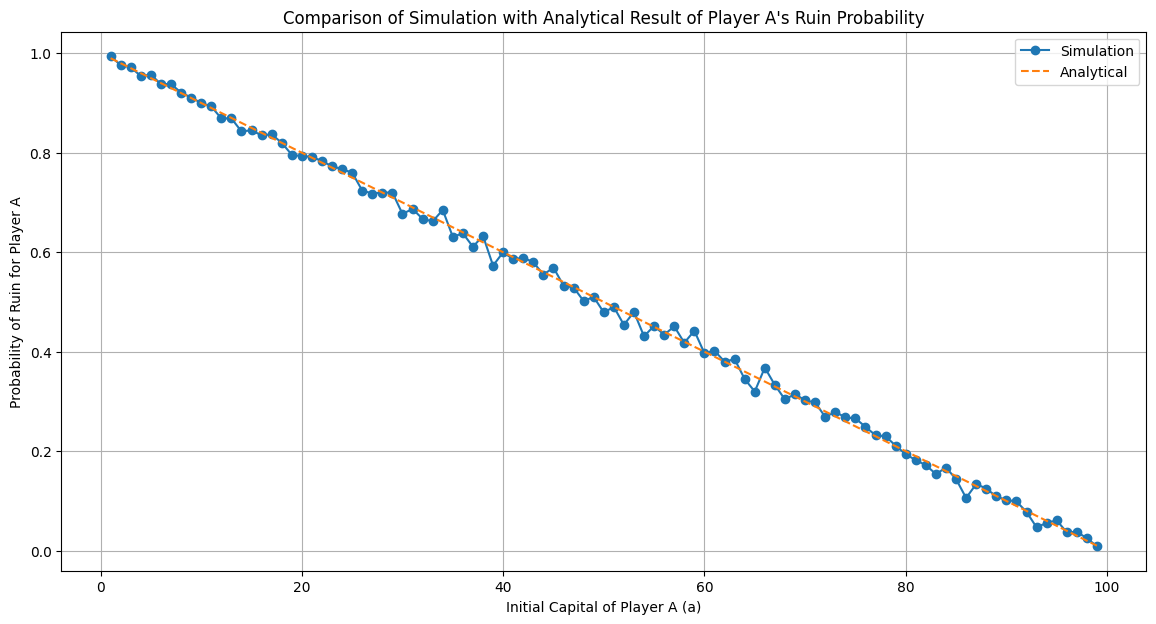

In [1]:
import random
import matplotlib.pyplot as plt

def simulate_game(a, b, p=0.5):
    """
    Simulate a game between two players until one of them goes bankrupt.
    :param a: Initial capital of player A
    :param b: Initial capital of player B
    :param p: Probability of player A winning a single bet
    :return: True if player A goes bankrupt, False otherwise
    """
    while a > 0 and b > 0:  
        if random.random() < p:
            a += 1
            b -= 1
        else:
            a -= 1
            b += 1
    return a == 0

def simulate_ruin(initial_a, simulations=1000):
    """
    Conducts a series of simulations to estimate the probability of ruin for player A.
    :param initial_a: Initial capital of player A
    :param simulations: Number of simulations conducted
    :return: Probability of ruin for player A
    """
    ruins = 0

    for _ in range(simulations):
        if simulate_game(initial_a, 100 - initial_a):
            ruins += 1

    return ruins / simulations

simulation_results = []
a_capital_values = range(1, 100)
for capital_a in a_capital_values:
    simulation_results.append(simulate_ruin(capital_a))

ruin_probability = [(100 - a) / 100 for a in a_capital_values]

plt.figure(figsize=(14, 7))
plt.plot(a_capital_values, simulation_results, label='Simulation', marker='o')
plt.plot(a_capital_values, ruin_probability, label='Analytical', linestyle='--')
plt.title('Comparison of Simulation with Analytical Result of Player A\'s Ruin Probability')
plt.xlabel('Initial Capital of Player A (a)')
plt.ylabel('Probability of Ruin for Player A')
plt.legend()
plt.grid(True)
plt.show()
